In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x=np.linspace(-1,1,100).reshape(-1,1)
y=2*x+1


In [15]:
def relu(z):
    return np.maximum(0,z)

In [19]:
def forward(x,weights,biases):
    a=x
    for W,b in zip(weights[:-1],biases[:-1]):
        a=relu(a@ W+b)
    return a @ weights[-1] + biases[-1]

In [20]:
# -----------------------------------------
# Train model with given number of hidden layers
# -----------------------------------------
def train_with_layers(num_layers, lr=0.05, epochs=50, hidden_units=10):

    # -----------------------------------------
    # CREATE NETWORK WEIGHTS AND BIASES
    # -----------------------------------------
    weights = []
    biases = []

    # If we have at least 1 hidden layer
    if num_layers > 0:

        # Input → First hidden layer
        # Shape: (input_dim=1, hidden_units)
        weights.append(np.random.randn(1, hidden_units) * 0.1)
        biases.append(np.zeros((1, hidden_units)))

        # Hidden → Hidden connections for multiple layers
        for _ in range(num_layers - 1):
            weights.append(np.random.randn(hidden_units, hidden_units) * 0.1)
            biases.append(np.zeros((1, hidden_units)))

        # Last hidden layer → Output layer
        # Shape: (hidden_units, output_dim=1)
        weights.append(np.random.randn(hidden_units, 1) * 0.1)
        biases.append(np.zeros((1, 1)))

    else:
        # If num_layers == 0 → linear model (no hidden layers)
        weights.append(np.random.randn(1, 1) * 0.1)
        biases.append(np.zeros((1, 1)))


    # Store loss at each epoch
    loss_history = []

    # -----------------------------------------
    # TRAINING LOOP
    # -----------------------------------------
    for epoch in range(epochs):

        # -----------------------
        # FORWARD PASS
        # -----------------------
        y_pred = forward(x, weights, biases)

        # Compute Mean Squared Error loss
        loss = np.mean((y_pred - y)**2)
        loss_history.append(loss)

        # -----------------------
        # BACKPROP STARTS HERE
        # -----------------------

        # Gradient of loss with respect to predictions
        # dL/dy_pred = 2*(pred - true)/N
        grad_y = 2 * (y_pred - y) / len(x)

        # Create containers for gradients of each layer
        grads_w = [None] * len(weights)
        grads_b = [None] * len(biases)

        # -----------------------------------------
        # Compute activations of all hidden layers
        # -----------------------------------------
        activations = [x]   # a0 = input
        a = x
        for W, b in zip(weights[:-1], biases[:-1]):
            # Apply linear transform + ReLU activation
            a = relu(a @ W + b)
            activations.append(a)

        # -----------------------------------------
        # BACKPROP THROUGH OUTPUT LAYER
        # -----------------------------------------
        # Gradient of weights for last layer = a(L-1)^T * delta
        grads_w[-1] = activations[-1].T @ grad_y
        grads_b[-1] = np.sum(grad_y, axis=0, keepdims=True)

        # Gradient flowing back: delta = dL/dz
        delta = grad_y @ weights[-1].T

        # -----------------------------------------
        # BACKPROP THROUGH HIDDEN LAYERS
        # -----------------------------------------
        for i in range(len(weights) - 2, -1, -1):

            # Derivative of ReLU (1 if positive, else 0)
            da = (activations[i+1] > 0).astype(float)

            # Multiply by previous delta
            delta = delta * da

            # Gradients for this layer
            grads_w[i] = activations[i].T @ delta
            grads_b[i] = np.sum(delta, axis=0, keepdims=True)

            # Propagate delta backwards to previous layer
            if i > 0:
                delta = delta @ weights[i].T

        # -----------------------------------------
        # UPDATE WEIGHTS AND BIASES
        # -----------------------------------------
        for i in range(len(weights)):
            weights[i] -= lr * grads_w[i]   # weight update
            biases[i] -= lr * grads_b[i]    # bias update

    # Return tracked loss values
    return loss_history

In [21]:
layer_options=[0,1,2,3]
results={}
for L in layer_options:
    results[L] = train_with_layers(L)

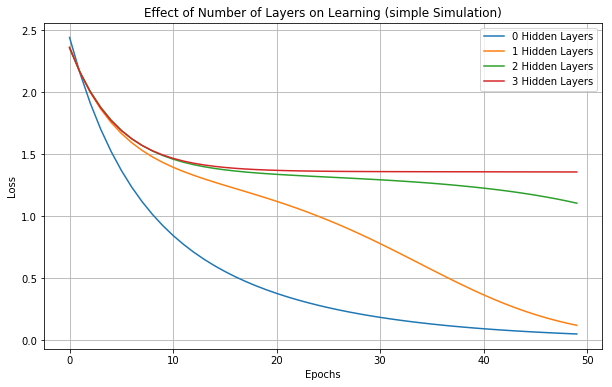

In [22]:
plt.figure(figsize=(10,6))

for L in layer_options:
    plt.plot(results[L], label=f"{L} Hidden Layers")
    
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Effect of Number of Layers on Learning (simple Simulation)")
plt.legend()
plt.grid(True)
plt.show()